# Práctica 1 - Self-Organising Maps
## Preparación de entorno
#### Importar librerías de código

In [323]:
%reset
# from __future__ import division

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as patches

%matplotlib inline

Nothing done.


#### Dataset que se va a utilizar para el entrenamiento

In [324]:
# Código para obtener el Dataset que se va a usar en el entrenamiento
valor_min = 0
valor_max = 256     #256 porque el valor máximo es exclusivo, es decir, irá de 0 a 255
valores_color = 3
num_colores = 100
datos = np.random.randint(valor_min, valor_max, (num_colores, valores_color))
print(f"La matriz de 100 colores:\n",datos)







La matriz de 100 colores:
 [[ 51  55 106]
 [226 155 237]
 [219 100 139]
 [183  80 238]
 [115  97 138]
 [ 58  97  24]
 [ 94  69 192]
 [247  85 102]
 [ 44 196   8]
 [146 254 186]
 [100 253  58]
 [240 155 224]
 [192 232 190]
 [161  46 169]
 [ 51   4 128]
 [140 206  86]
 [199 173  79]
 [189  68  56]
 [ 67 171 218]
 [225  28  51]
 [ 34  11  59]
 [212  41 238]
 [209  53 162]
 [126  54  51]
 [182  58  28]
 [ 54 176 234]
 [ 20 163 163]
 [122 198  87]
 [ 19 102 185]
 [242   3  78]
 [ 46  95  16]
 [110 223 152]
 [254  57 138]
 [157 160 118]
 [109 189 152]
 [228  83 151]
 [213 100  67]
 [173  71  12]
 [ 30  79 252]
 [122 125 107]
 [ 23 138  93]
 [ 79   6 100]
 [203 175  38]
 [214  23 244]
 [ 27  23  95]
 [158 211 177]
 [201  66 235]
 [159   7 129]
 [246  54 199]
 [ 47 219 187]
 [128  81 245]
 [  0 201 130]
 [ 67 238 114]
 [ 75 117 140]
 [171 223  44]
 [160 148  87]
 [226 170  25]
 [ 50 146 176]
 [ 61  42 138]
 [  1 135 157]
 [247  80  65]
 [ 17 162 101]
 [ 79 109 125]
 [ 53  68  25]
 [211   8 225

## SOM Setup
#### Variables definidas por el alumno

In [325]:
# Inicializa tamaño del mapa de Kohonen, número de iteraciones y learning rate
# Inicializa normalizar_datos dependiendo de si tienes que normalizar los datos o no
lado_mapa = 50
periodo = 1000
learning_rate = 0.15
normalizar_datos = True

#### A partir de este punto solo hay cálculos. No se introducen más valores "a mano"

In [326]:
# Establece el numero de entradas del mapa y el número de datos que se van a usar para entrenar. 
# Utiliza una función que obtenga automáticamente los valores a partir del Dataset.

num_entradas = len(datos[0])   #Usamos len para contar el numero de filas y columnas
num_datos = len(datos)     

def obtener_Entrada(datos):
   valor_aleatorio = np.random.randint(0,100)
   return datos[valor_aleatorio]

# Calcula el vecindario inicial. Debe ser la mitad del lado del mapa de Kohonen
vecindario = lado_mapa/2

# Normaliza los datos si fuese necesario dividiendo cada dato por el máximo en la matriz
# Calculamos el valor maximo de la matriz

valor_maximo = 0
for dato in datos:
    for valor in dato:
        if(valor_maximo < valor):
            valor_maximo = valor  
      
if normalizar_datos:
    datos = datos/valor_max    
    
    
# Crea una matriz de pesos con valores random entre 0 y 1. Usa la función random.random de la librería NumPy
#matriz_pesos = np.random.random((dimensiones de la matriz de pesos))

matriz_pesos = np.random.random((lado_mapa*lado_mapa,num_entradas))
print(matriz_pesos)


[[0.32890934 0.34044368 0.30153233]
 [0.04610785 0.67071536 0.06075633]
 [0.83895779 0.17218588 0.14028394]
 ...
 [0.72564332 0.53265723 0.74682734]
 [0.66759572 0.12785731 0.37127013]
 [0.20621293 0.61032851 0.12437843]]


#### Funciones para entrenar/clasificar

In [327]:
# Función para encontrar la BMU
"""
   Encuentra la BMU para un patrón de entrada.
   Entradas: (patrón_de_entrada, matriz_de_pesos, número_de_entradas)
   Salidas:  (bmu, bmu_idx) tupla donde
               bmu: vector de pesos de la neurona ganadora
               bum_idx: coordenadas de la neurona ganadora
"""

def calcular_bmu(patron_entrada, matriz_pesos, m):
   
   """
    Diferencias es un array de 3 elementos que tendrá el cuadrado de la resta de la entrada menos el peso para calcular la distancia euclídea que
    terminará calculándose en distancia local haciendo la raíz de la suma de los valores anteriores.
   
   """
   distancia_local = 0                      
   distancia_minima = float('inf')
   diferencias = np.zeros(m)
   bmu = []
   bmu_idx = ()

   for i in range(len(matriz_pesos)):
      for j in range(m):
         diferencias[j] = (patron_entrada[j] - matriz_pesos[i,j]) ** 2
      """

      Distancia local tendrá la distancia que se esté calculando en el momento, es decir, en la primera iteración tendrá la distancia de la 
      neurona 0,0 al patrón de entrada, después la de 0,1 y así sucesivamente.
      Si la distancia local es menor que la distancia mínima consideraremos esa neurona como la bmu. En la primera iteración la primera neurona 
      será la bmu ya que distancia mínima está inicializada a infinito.
      
      """
      distancia_local = np.sqrt(np.sum(diferencias))
      if(distancia_local < distancia_minima):
         distancia_minima = distancia_local
         bmu = matriz_pesos[i]
         bmu_idx = (i//lado_mapa,i%lado_mapa)
         posicion = i
   # Por último retornamos la bmu , su posición en el mapa y su posición en la matriz
   return bmu, bmu_idx, posicion
           
patron_entrada = obtener_Entrada(datos)     
bmu, bmu_idx, posicion = calcular_bmu(patron_entrada, matriz_pesos, num_entradas)
print(f"El patrón de entrada es:\n",patron_entrada)
print(f"Y la BMU es:")
print(f"Valor:",bmu,"\nCordenadas:",bmu_idx, "Posicion:",posicion)

    
    

El patrón de entrada es:
 [0.4140625  0.23828125 0.61328125]
Y la BMU es:
Valor: [0.39815033 0.29175679 0.64170225] 
Cordenadas: (3, 34) Posicion: 184


In [328]:
# Función para calcular el descenso del coeficiente de aprendizaje (eta)
"""
   Calcula el Learning Rate (eta) que corresponde a la i-ésima presentación.
   Entradas: (learning_rate_inicial, iteracion, período)
   Salidas:  learning_rate para la iteración i

"""
#Aplicamos la función para calcular la variación de lr
def variacion_learning_rate(lr_inicial, i, n_iteraciones):
    return lr_inicial * (1-(i/n_iteraciones)) 

In [329]:
# Función para calcular el descenso del vecindario (v)
"""
   Calcula el vecindario  (v) que corresponde a la i-ésima presentación.
   Entradas: (vecindario_inicial, iteracion, período)
   Salidas:  lvecindario para la iteración i

"""
def variacion_vecindario(vecindario_inicial, i, n_iteraciones):
   return 1 + vecindario_inicial * (1-(i/n_iteraciones))

In [330]:
# Función para calcular el descenso del coeficiente de aprendizaje (eta) en función de la distancia a la BMU
"""
   Calcula la amortiguación de eta en función de la distancia en el mapa entre una neurona y la BMU.
   Entradas: (distancia_BMU, vecindario_actual)
   Salidas:  amortiguación para la iteración

"""
def decay(distancia_BMU, vecindario_actual):
    return np.exp(-distancia_BMU / (2* (vecindario_actual**2)))

#### Funciones para dibujar la salida de la red

In [331]:
# Función para pintar una matriz de valores como colores RGB
def pintar_mapa(matriz_valores, titulo):
    
    # Reformateamos la matriz de pesos de (100, 3) a (10, 10, 3)
    mapa_colores = matriz_pesos.reshape((lado_mapa, lado_mapa, 3))
    # Mostramos la imagen con los colores RGB
    plt.figure(figsize=(6, 6))
    plt.imshow(mapa_colores, aspect='equal')
    plt.title(titulo)
    plt.axis("off")  # Quitamos los ejes para mejor visualización
    plt.show()





## SOM Entrenamiento

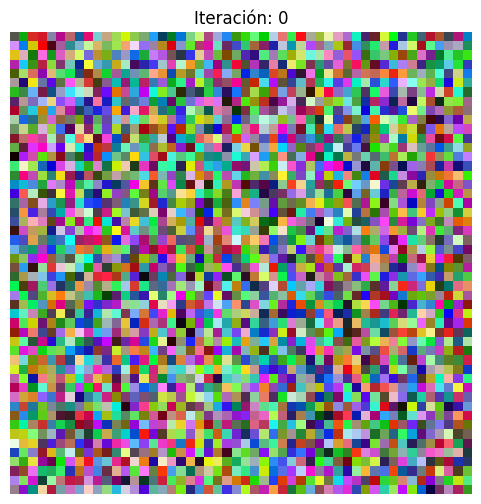

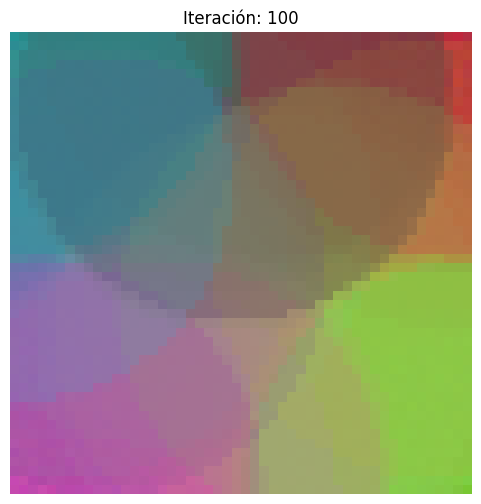

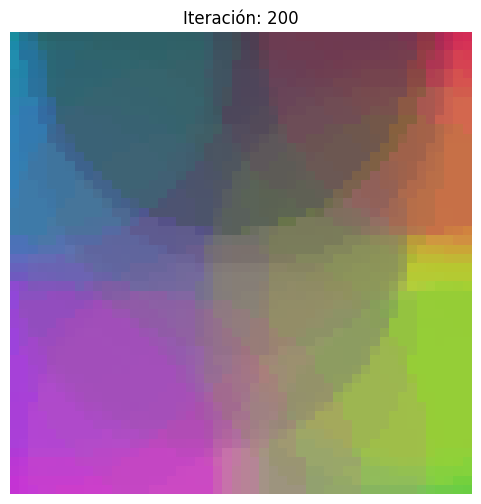

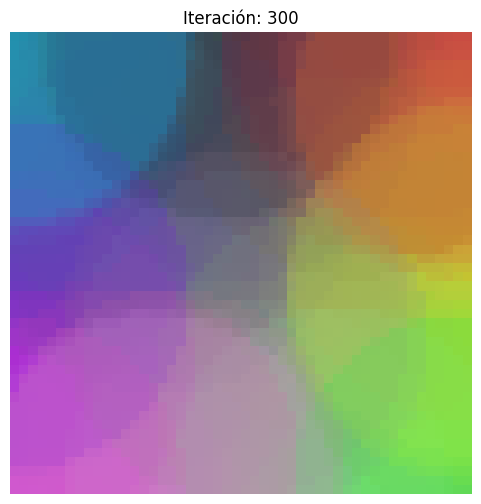

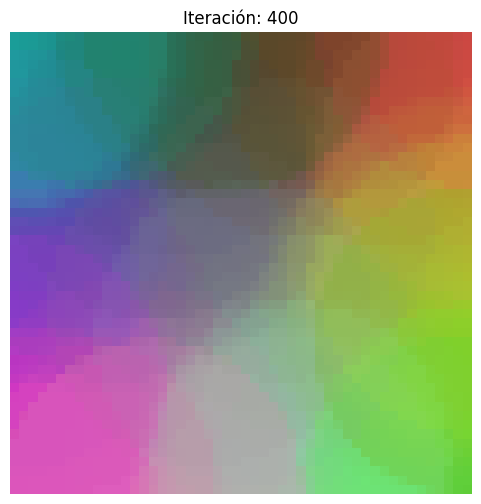

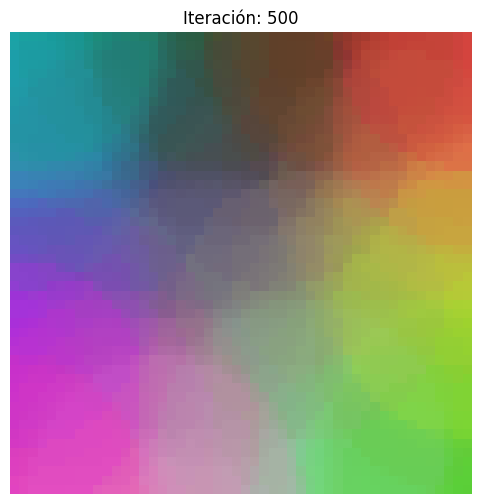

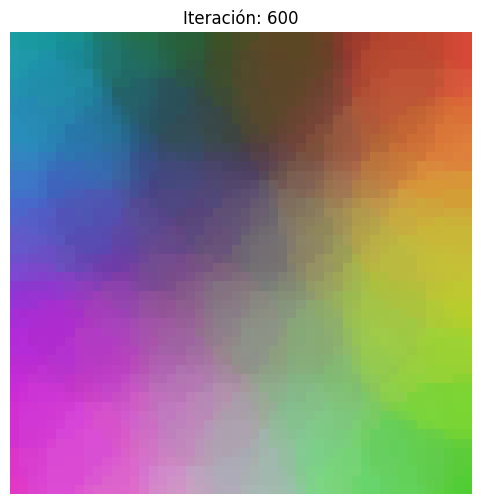

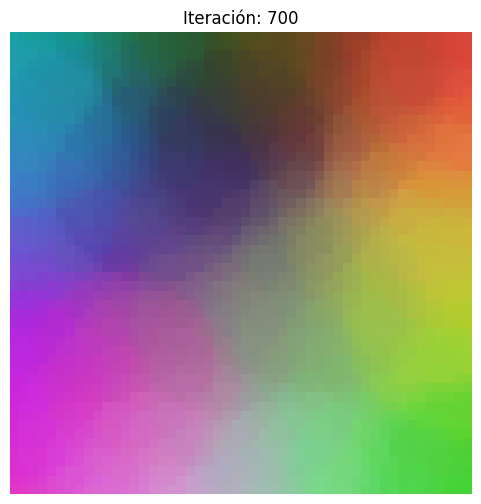

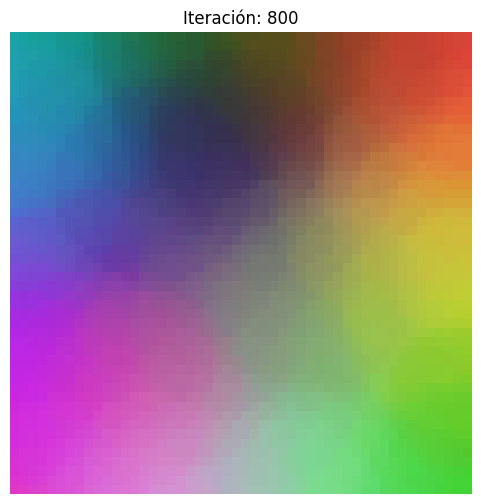

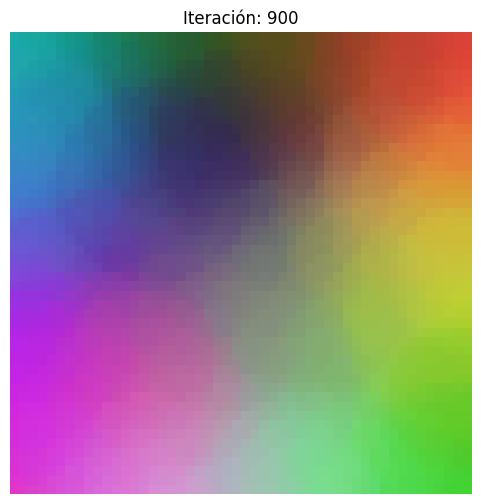

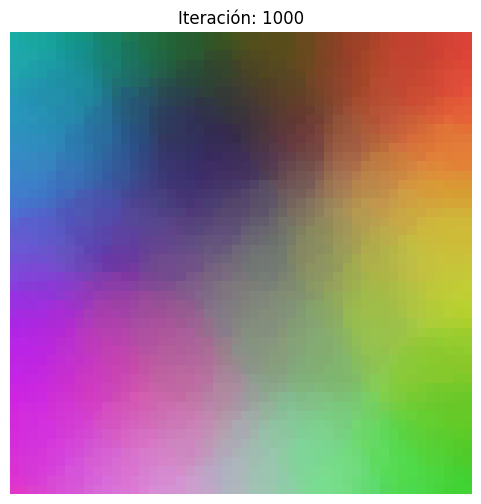

In [332]:
# Bucle principal


for i in range(periodo+1):
    if i % 100 == 0:
        pintar_mapa(matriz_pesos, f"Iteración: {i}")
    
    # Obtenemos el patrón de entrada ya normalizado
    patron_entrada = obtener_Entrada(datos)
    
    # Encontramos la bmu y calculamos eta y v
    bmu, bmu_idx, posicion = calcular_bmu(patron_entrada, matriz_pesos, num_entradas)
    eta = variacion_learning_rate(learning_rate, i, periodo)
    v = variacion_vecindario(vecindario, i, periodo)
    
    # Actualiza la matriz de pesos
    for j in range(len(matriz_pesos)):
        # Coordenadas de la neurona en la matriz
        x = j // lado_mapa
        y = j % lado_mapa
        
        # Calcula la distancia euclídea 2D respecto a la BMU
        distancia_BMU = np.sqrt((x - bmu_idx[0])**2 + (y - bmu_idx[1])**2)
        
        # Si está dentro del vecindario, actualizar pesos
        if distancia_BMU <= v:
            amortiguacion = decay(distancia_BMU, v)
            matriz_pesos[j] += eta * amortiguacion * (patron_entrada - matriz_pesos[j])



    

    



## SOM Clasificación

In [333]:
# Clasifica los patrones de entrenamiento con la matriz de pesos recién entrenada

mapa_clasificacion = np.zeros((lado_mapa*lado_mapa, num_entradas))
mapa_activacion = np.zeros((lado_mapa, lado_mapa))
mapa_distancias = np.zeros((lado_mapa, lado_mapa))
# Creamos una matriz auxiliar para acumular la suma de las distancias
suma_distancias = np.zeros((lado_mapa, lado_mapa))

for patron in datos:

    # Calculamos la bmu para cada patron del dataset y actualizamos el mapa de clasificación y el de activación
    bmu, bmu_idx, posicion = calcular_bmu(patron, matriz_pesos, num_entradas)
    print(f"Cordenadas de la bmu: ", bmu_idx)

    mapa_clasificacion[posicion] = patron_entrada
    mapa_activacion[bmu_idx[0], bmu_idx[1]] += 1

    #Calcula la distancia del patron a su bmu y se acumumla en la neurona correspondiente
    distancia = np.linalg.norm(patron - bmu)
    suma_distancias[bmu_idx[0], bmu_idx[1]] += distancia
    
    # Calcular la distancia media solo para las neuronas activadas

for x in range(lado_mapa):
    for y in range(lado_mapa):
        if mapa_activacion[x, y] > 0:  # Solo calcular si la neurona fue activada
            mapa_distancias[x, y] = suma_distancias[x, y] / mapa_activacion[x, y]

print(f"Mapa de clasificacion\n", mapa_clasificacion)
print(f"Mapa de activacion\n", mapa_activacion)
print(f"Mapa de distancias:\n", mapa_distancias)




Cordenadas de la bmu:  (12, 16)
Cordenadas de la bmu:  (49, 16)
Cordenadas de la bmu:  (38, 15)
Cordenadas de la bmu:  (46, 6)
Cordenadas de la bmu:  (26, 20)
Cordenadas de la bmu:  (0, 23)
Cordenadas de la bmu:  (23, 7)
Cordenadas de la bmu:  (6, 49)
Cordenadas de la bmu:  (48, 49)
Cordenadas de la bmu:  (49, 30)
Cordenadas de la bmu:  (45, 43)
Cordenadas de la bmu:  (49, 15)
Cordenadas de la bmu:  (49, 25)
Cordenadas de la bmu:  (29, 10)
Cordenadas de la bmu:  (15, 20)
Cordenadas de la bmu:  (37, 39)
Cordenadas de la bmu:  (21, 41)
Cordenadas de la bmu:  (3, 41)
Cordenadas de la bmu:  (12, 0)
Cordenadas de la bmu:  (1, 48)
Cordenadas de la bmu:  (10, 23)
Cordenadas de la bmu:  (39, 2)
Cordenadas de la bmu:  (35, 12)
Cordenadas de la bmu:  (9, 33)
Cordenadas de la bmu:  (0, 40)
Cordenadas de la bmu:  (12, 0)
Cordenadas de la bmu:  (1, 4)
Cordenadas de la bmu:  (40, 40)
Cordenadas de la bmu:  (13, 8)
Cordenadas de la bmu:  (0, 49)
Cordenadas de la bmu:  (0, 22)
Cordenadas de la bmu:  (

## SOM Prueba

In [334]:
# Clasifica nuevos patrones

